<a href="https://colab.research.google.com/github/HugoKD/byoRNA/blob/main/ByoRna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random
import math
import numpy as np
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Test

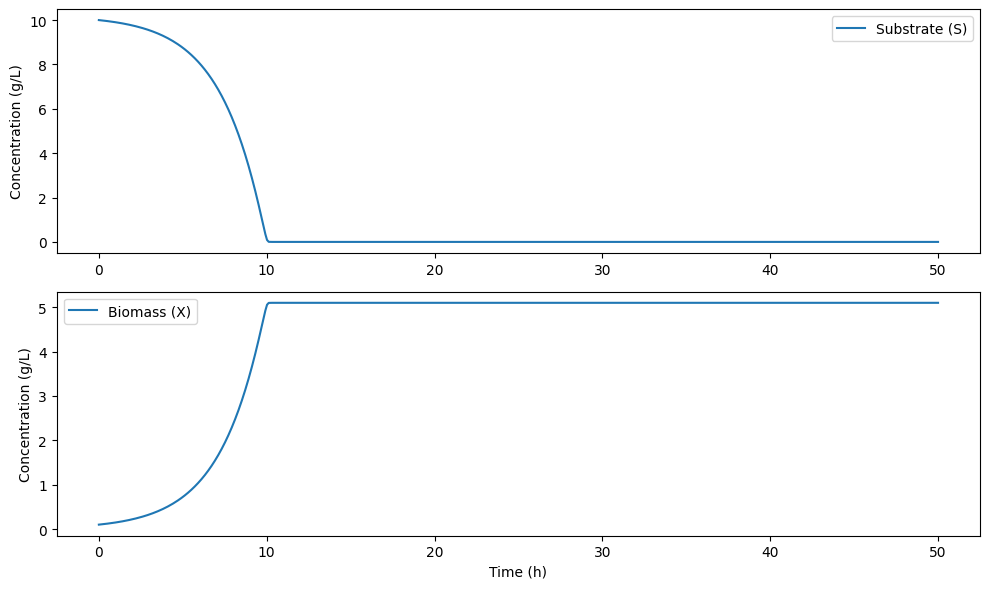

In [2]:
###SIMU 1 ########
#g/L
mu_max = 0.4   # Maximum specific growth rate (1/h)
K_S = 0.1      # Half-saturation constant (g/L)
Y_SX = 0.5     # Yield of biomass per unit substrate (g biomass / g substrate)

# Initial conditions
S0 = 10.0  # Initial substrate concentration (g/L)
X0 = 0.1   # Initial biomass concentration (g/L)
initial_conditions = [S0, X0]

t = np.linspace(0, 50, 500)

def monod_kinetics(y, t, mu_max, K_S, Y_SX):
    S, X = y
    mu = mu_max * S / (K_S + S)  # Specific growth rate
    dX_dt = mu * X  # Rate of biomass production
    dS_dt = -1 / Y_SX * mu * X  # Rate of substrate consumption
    return [dS_dt, dX_dt]

# Solve the differential equations
solution = odeint(monod_kinetics, initial_conditions, t, args=(mu_max, K_S, Y_SX))
S, X = solution.T

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, S, label='Substrate (S)')
plt.ylabel('Concentration (g/L)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(t, X, label='Biomass (X)')
plt.xlabel('Time (h)')
plt.ylabel('Concentration (g/L)')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


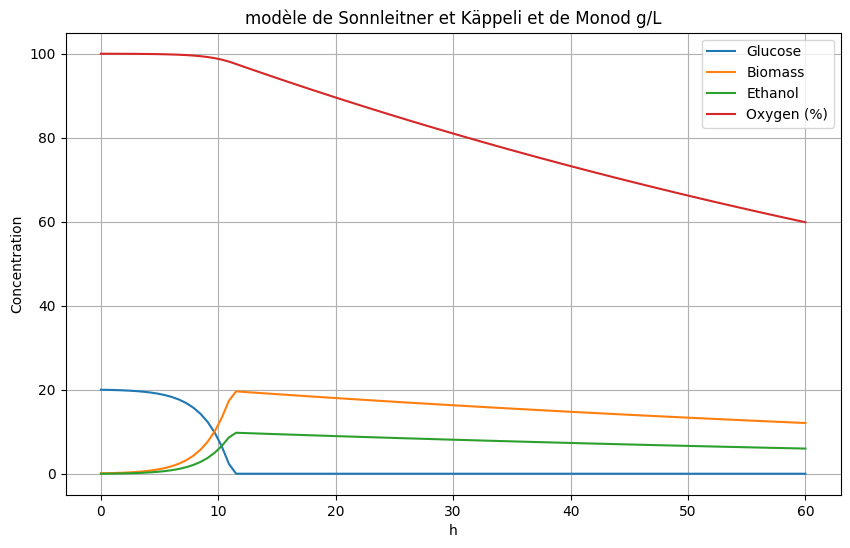

In [3]:

# Model parameters
mu_max = 0.5  # maximum specific growth rate (h^-1), to know
K_s = 0.5  # Monod constant for glucose (g/L), to know
Y_E = 0.5  # ethanol yield coefficient (g/g)
q_O = 0.05  # specific oxygen consumption rate (%/g.h)
m = 0.01  # maintenance rate (h^-1)

# Initial conditions
G0 = 20  # initial glucose concentration (g/L)
X0 = 0.1  # initial biomass concentration (g/L)
E0 = 0  # initial ethanol concentration (g/L)
O0 = 100  # initial oxygen concentration (%)

# Differential equations
def model(y, t):
    G, X, E, O = y
    mu = mu_max * (G / (K_s + G))
    dG_dt = -mu * X
    dX_dt = (mu - m) * X
    dE_dt = Y_E * (mu - m) * X
    dO_dt = -q_O * X
    return [dG_dt, dX_dt, dE_dt, dO_dt]

# Simulation time (hours)
time = np.linspace(0, 60, 100)

# Initial conditions
y0 = [G0, X0, E0, O0]

# Solve the differential equations
solution = odeint(model, y0, time)
G, X, E, O = solution.T

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(time, G, label='Glucose')
plt.plot(time, X, label='Biomass')
plt.plot(time, E, label='Ethanol')
plt.plot(time, O, label='Oxygen (%)')

plt.xlabel('h')
plt.ylabel('Concentration')
plt.title('modèle de Sonnleitner et Käppeli et de Monod g/L')
plt.legend()
plt.grid(True)
plt.show()

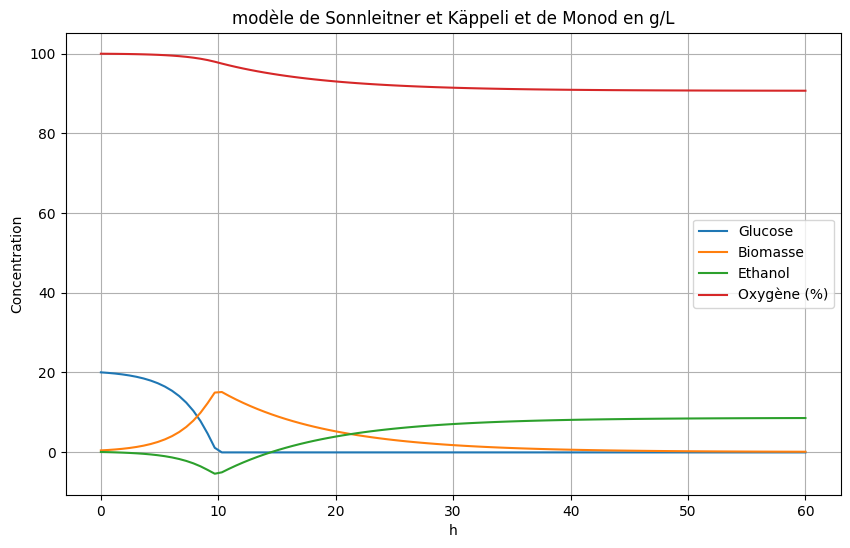

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Paramètres du modèle
mu_max = 0.4  # taux de croissance spécifique maximal (h^-1)
K_s = 0.5  # constante de saturation de Monod pour le glucose (g/L)
Y_E = 0.5  # rendement de l'éthanol sur le glucose (g/g)
q_G = 0.1  # taux spécifique de consommation de glucose (g/g.h)
q_O = 0.05  # taux spécifique de consommation d'oxygène (%/g.h)
m = 0.01  # taux de maintenance (h^-1)

# Conditions initiales
G0 = 20  # concentration initiale de glucose (g/L)
X0 = 0.4  # concentration initiale de biomasse (g/L)
E0 = 0  # concentration initiale d'éthanol (g/L)
O0 = 100  # concentration initiale d'oxygène (%)

# Équations différentielles
def model(y, t):
    G, X, E, O = y
    mu = mu_max * (G / (K_s + G))
    dG_dt = -mu * X - q_G * X
    dX_dt = (mu - m) * X
    dE_dt = Y_E * (q_G - mu) * X
    dO_dt = -q_O * X
    return [dG_dt, dX_dt, dE_dt, dO_dt]

# Temps de simulation (heures)
time = np.linspace(0, 60, 100)

# Conditions initiales
y0 = [G0, X0, E0, O0]

# Résoudre les équations différentielles
solution = odeint(model, y0, time)
G, X, E, O = solution.T

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(time, G, label='Glucose')
plt.plot(time, X, label='Biomasse')
plt.plot(time, E, label='Ethanol')
plt.plot(time, O, label='Oxygène (%)')

plt.xlabel('h')
plt.ylabel('Concentration')
plt.title('modèle de Sonnleitner et Käppeli et de Monod en g/L')
plt.legend()
plt.grid(True)
plt.show()

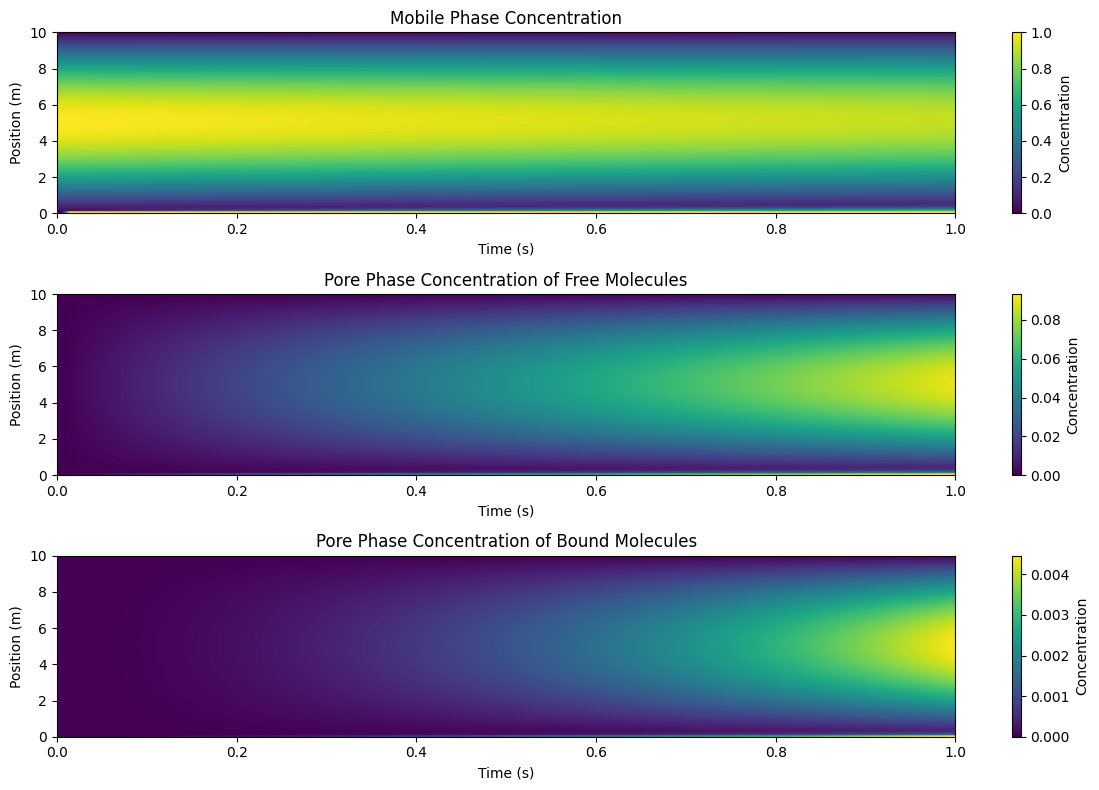

In [105]:
import numpy as np
import matplotlib.pyplot as plt

def get_c_in(t1,t2,t,c_f):
  if t1<=t<=t2:
    return c_f
  else :
    return 0

# Parameters
L = 10          # Length of the column (m)
T = 1.0          # Total time (s)
v = 0.1          # Linear mobile phase velocity (m/s)
D = 0.01         # Diffusion coefficient (m^2/s)
Nx = 100        # Number of spatial grid points
Nt = 100       # Number of time steps
dx = L / Nx      # Spatial step size --> spacial discretisation
dt = T / Nt      # Time step size

#################################### to make it more realistic
epsilon_p = 0.5  # Intraparticle porosity
epsiolon_c = 0.3  # Porosity
u_sf = 1.33     # Superfiocial velocity
k_eq = 61.47 / 0.001 #L/g
q_sat = 69.10 # g/L
D_s = 2.33 * 10 ** -3
k_F = 1.09*u_sf/epsilon_c
#####################################


# Initialize concentration arrays
c = np.zeros(Nx)        # Mobile phase concentration
cp = np.zeros(Nx)       # Pore phase concentration of free molecules
q = np.zeros(Nx)        # Pore phase concentration of bound molecules

# Initial conditions
c0 = lambda z: np.sin(np.pi * z / L)  # Example initial condition for c
cp0 = lambda z: np.zeros_like(z)                 # Example initial condition for cp
q0 = lambda z: np.zeros_like(z)                  # Example initial condition for q

# Apply initial conditions

z = np.linspace(0, L, Nx)
c = c0(z)
cp = cp0(z)
q = q0(z)


# Transport and production rates
R = lambda c, cp, q: 0.1 * (c - cp)   # Example rate term
Rp = lambda c, cp, q: 0.1 * (c - cp)  # Example rate term
Rq = lambda c, cp, q: 0.1 * (cp - q)  # Example rate term

# Storage for results
c_history = [c.copy()]
cp_history = [cp.copy()]
q_history = [q.copy()]

# Main loop
for n in range(1, Nt):
    # Calculate fluxes
    J = -D * np.gradient(c, dx)
    N = v * c + J

    # Update concentrations
    dc_dt = -np.gradient(N, dx) - R(c, cp, q)
    dcp_dt = Rp(c, cp, q)
    dq_dt = Rq(c, cp, q)

    c += dc_dt * dt
    cp += dcp_dt * dt
    q += dq_dt * dt

    # Apply boundary conditions
    c[0] = 1.0                     # Inlet concentration
    c[-1] = c[-1]                  # Outflow follows the last grid point

    # Store results
    c_history.append(c.copy())
    cp_history.append(cp.copy())
    q_history.append(q.copy())

# Convert history to numpy arrays for easier slicing
c_history = np.array(c_history)
cp_history = np.array(cp_history)
q_history = np.array(q_history)

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.title('Mobile Phase Concentration')
plt.imshow(c_history.T, aspect='auto', origin='lower', extent=[0, T, 0, L])
plt.colorbar(label='Concentration')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

plt.subplot(3, 1, 2)
plt.title('Pore Phase Concentration of Free Molecules')
plt.imshow(cp_history.T, aspect='auto', origin='lower', extent=[0, T, 0, L])
plt.colorbar(label='Concentration')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

plt.subplot(3, 1, 3)
plt.title('Pore Phase Concentration of Bound Molecules')
plt.imshow(q_history.T, aspect='auto', origin='lower', extent=[0, T, 0, L])
plt.colorbar(label='Concentration')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

plt.tight_layout()
plt.show()

## POO

On va faire un poo en python pour simuler le process de filtration. Chaque filtre possède une certaine affinité, des certaines caractéristiques. On veut arriver à un résultat optimal en un nombre d'étapes minimales -> programation sous contraintes. On veut un nombre de step min et un quantité d'ARN maximale (ou alors une pureté maximale). Pour l'instant on ne considère que la taille de la molécule d'interêt. <br><br>
De base on part d'une population de x% d'ARN,y% ADN, z% débrit, w% de protéine, v% de virus et p% de petites molécules -> fixé. La masse totale de la mixture,elle n'est pas fixée. Cf UPS

In [3]:
class USP:
    def __init__(self, mu_max=0.4, K_s=0.9, Y_E=0.8, q_G=0.1, q_O=0.5, m=0.01, G0=20, X0=0.4, E0=0, O0=100):
        self.mu_max = mu_max  # taux de croissance spécifique maximal (h^-1)
        self.K_s = K_s  # constante de saturation de Monod pour le glucose (g/L)
        self.Y_E = Y_E  # yield de l'éthanol sur le glucose (g/g)
        self.q_G = q_G  # taux spécifique de consommation de glucose (g/g.h)
        self.q_O = q_O  # taux spécifique de consommation d'oxygène (%/g.h)
        self.m = m  # taux de maintenance (h^-1)
        # concentrations initiales
        self.G0 = G0  # c_i de glucose (g/L)
        self.X0 = X0  # c_i de biomasse (g/L)
        self.E0 = E0  # c_i d'éthanol (g/L)
        self.O0 = O0  # c_i d'oxygène (%)
        self.solution = None  # Variable pour stocker la solution

    def model(self, y, t):
        G, X, E, O = y
        mu = self.mu_max * (G / (self.K_s + G))
        dG_dt = -mu * X - self.q_G * X
        dX_dt = (mu - self.m) * X
        dE_dt = self.Y_E * (self.q_G - mu) * X
        dO_dt = -self.q_O * X
        return [dG_dt, dX_dt, dE_dt, dO_dt]

    def get_solution(self, t_end=30, n=100, plot=True):
        t = np.linspace(0, t_end, n)  # en heure
        y0 = [self.G0, self.X0, self.E0, self.O0]
        # Résoudre les équa diffs avec odeint
        self.solution = odeint(self.model, y0, t)
        G, X, E, O = self.solution.T
        if plot:
            # Créer le graphique
            plt.figure(figsize=(10, 6))
            plt.plot(t, G, label='Glucose')
            plt.plot(t, X, label='Biomasse')
            plt.plot(t, O, label='Oxygène (%)')
            plt.xlabel('Temps (h)')
            plt.ylabel('Concentration (g/L)')
            plt.title('Modèle de Sonnleitner et Käppeli et de Monod')
            plt.legend()
            plt.grid(True)
            plt.show()
            return G, X, E, O
        else:
          return G, X, E, O

    def get_masse_X(self, taille):  # taille en L
        if self.solution is None:
            self.get_solution(plot=False)
        G, X, E, O = self.solution.T
        return X[-1] * taille  # return g de biomasse

In [4]:
usp = USP()

In [5]:
##V.1 simpliste sans considération physique
### Deux comportements différents des filtres basé sur la selectivité des pores : fonction logistique ou fonction de ""passage"""

class Filtration:
    def __init__(self, feed,filter_size):
        self.feed = feed #notre mixture qu'on filtre avec x% d'ARN,y% ADN, z% débrit, w% de protéine, v% de virus et p% de petites molécules
        self.filter_size = filter_size #1 seul parametre = taille du filtre, en nm
        self.filtrat = [] #fraction du mélange qui a passé à travers le filtre
        self.residu = [] #fraction du mélange qui n'a pas passé à travers le filtre

    def perform_filtration(self, type_, k_inf = 4.2, c_inf = 1.3,k_sup = 15, c_sup = 1.1): # k = degré de la pente, et c = pnt d'inflexion ou p = 0.5, ajoute d'aléatoire "controlé"
        for molecule in self.feed:
            size = molecule['size']
            r =   size /self.filter_size
            if size <= self.filter_size:
                if type_ == 'logistique':
                 p = 1 / (1 + exp(-k_inf * (c_inf - r))) #fonction logistique avec une forte augmentation de la proba de passer le filtre quand la taille diminue
                elif type_ == 'passage':
                  p = (1 - (size / self.filter_size) ** 2) ** 1
                else :
                  raise(ValueError("Type de filtre inconnu"))
                poids_residu, poids_filtrat = molecule["poids"]*(1-p),molecule["poids"]*p
                mol_filtrat,mol_residu = molecule.copy(),molecule.copy()
                mol_filtrat["poids"] = poids_filtrat
                mol_residu["poids"] = poids_residu
                self.filtrat.append(mol_filtrat)
                self.residu.append(mol_residu)
            else:
                if type_ == 'logistique':
                  p = 1- 1 / (1 + math.exp(-k_sup * (r - c_sup)))  #très forte diminution de la proba de passer le filtre quand la taille augmente
                elif type_ == 'passage':
                  p = 0
                else :
                  raise(ValueError("Type de filtre inconnu"))
                poids_residu, poids_filtrat = molecule["poids"]*(1-p),molecule["poids"]*p
                mol_filtrat,mol_residu =  molecule.copy(),molecule.copy()
                mol_filtrat["poids"] = poids_filtrat
                mol_residu["poids"] = poids_residu
                self.filtrat.append(mol_filtrat)
                self.residu.append(mol_residu)

    def get_results(self):
        return {
            'filtrat': self.filtrat,
            'residu': self.residu
        }

In [6]:
class DSP:
    def __init__(self, feed):
        self.feed = feed

    def get_mean(self, feed):
      s = 0
      for molecule in feed:
        s += molecule['size']
      return s/len(feed)

    def simulate(self, type_,filter_size = 300,display = False):
        # Perform filtration
        filtration = Filtration(self.feed, filter_size=filter_size)
        filtration.perform_filtration(type_)
        filtration_results = filtration.get_results()
        if display :
          print(f"initial : {self.feed}")
          print(f"filtrat: {filtration_results['filtrat']}")
          print(f"residu: {filtration_results['residu']}")
          return self.feed, filtration_results['filtrat'], filtration_results['residu']
        else :
          return self.feed, filtration_results['filtrat'], filtration_results['residu']

    def visu(self,type_):
        i,f,r = self.simulate(type_)
        data = {'initial' : i, 'filtrat' : f, "residu" : r}
        types = ["DNA", "RNA", "protein", "virus", "tiny_mol", "debris"]
        initial_weights = [item["poids"] for item in data["initial"]]
        filtrat_weights = [item["poids"] for item in data["filtrat"]]
        residu_weights = [next((item["poids"] for item in data["residu"] if item["type"] == t), 0) for t in types]

        # Creating the bar chart
        bar_width = 0.25
        x = np.arange(len(types))

        plt.figure(figsize=(10, 6))
        plt.bar(x - bar_width, initial_weights, width=bar_width, label='Initial')
        plt.bar(x, filtrat_weights, width=bar_width, label='Filtrat')
        plt.bar(x + bar_width, residu_weights, width=bar_width, label='Residu')

        plt.xlabel('Type')
        plt.ylabel('Poids')
        plt.title('Poids par Type pour Initial, Filtrat et Residu')
        plt.xticks(x, types)
        plt.legend()
        plt.show()

masse totale USP de 177.0787413970911


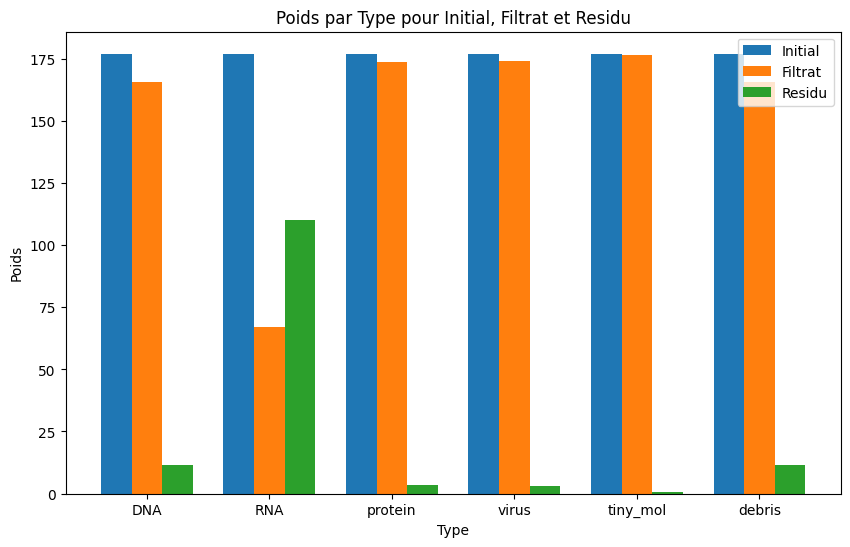

In [7]:
## Test

dalton_to_gram = 1.66053906660e-24

feed = [
    {'type': 'DNA', 'size': 200, 'pourcentage': 0.045, 'poids_unitaire': 200 * 330 * dalton_to_gram, 'poids' : usp.get_masse_X(100)},
    {'type': 'RNA', 'size': 340, 'pourcentage': 0.045, 'poids_unitaire': 340 * 340 * dalton_to_gram, 'poids' : usp.get_masse_X(100)},
    {'type': 'protein', 'size': 108, 'pourcentage': 0.10, 'poids_unitaire': 108 * 110 * dalton_to_gram, 'poids' : usp.get_masse_X(100)},
    {'type': 'virus', 'size': 100, 'pourcentage': 0.01, 'poids_unitaire': 100 * 10**9 * dalton_to_gram, 'poids' : usp.get_masse_X(100)},
    {'type': 'tiny_mol', 'size': 1, 'pourcentage': 0.01, 'poids_unitaire': 1 * 180 * dalton_to_gram, 'poids' : usp.get_masse_X(100)},
    {'type': 'debris', 'size': 200, 'pourcentage': 0.8, 'poids_unitaire': 200 * 5000 * dalton_to_gram, 'poids' : usp.get_masse_X(100)}
]

print(f"masse totale USP de {usp.get_masse_X(100)}")

# Create a DownstreamProcessing object and simulate
process = DSP(feed)
process.visu('logistique')

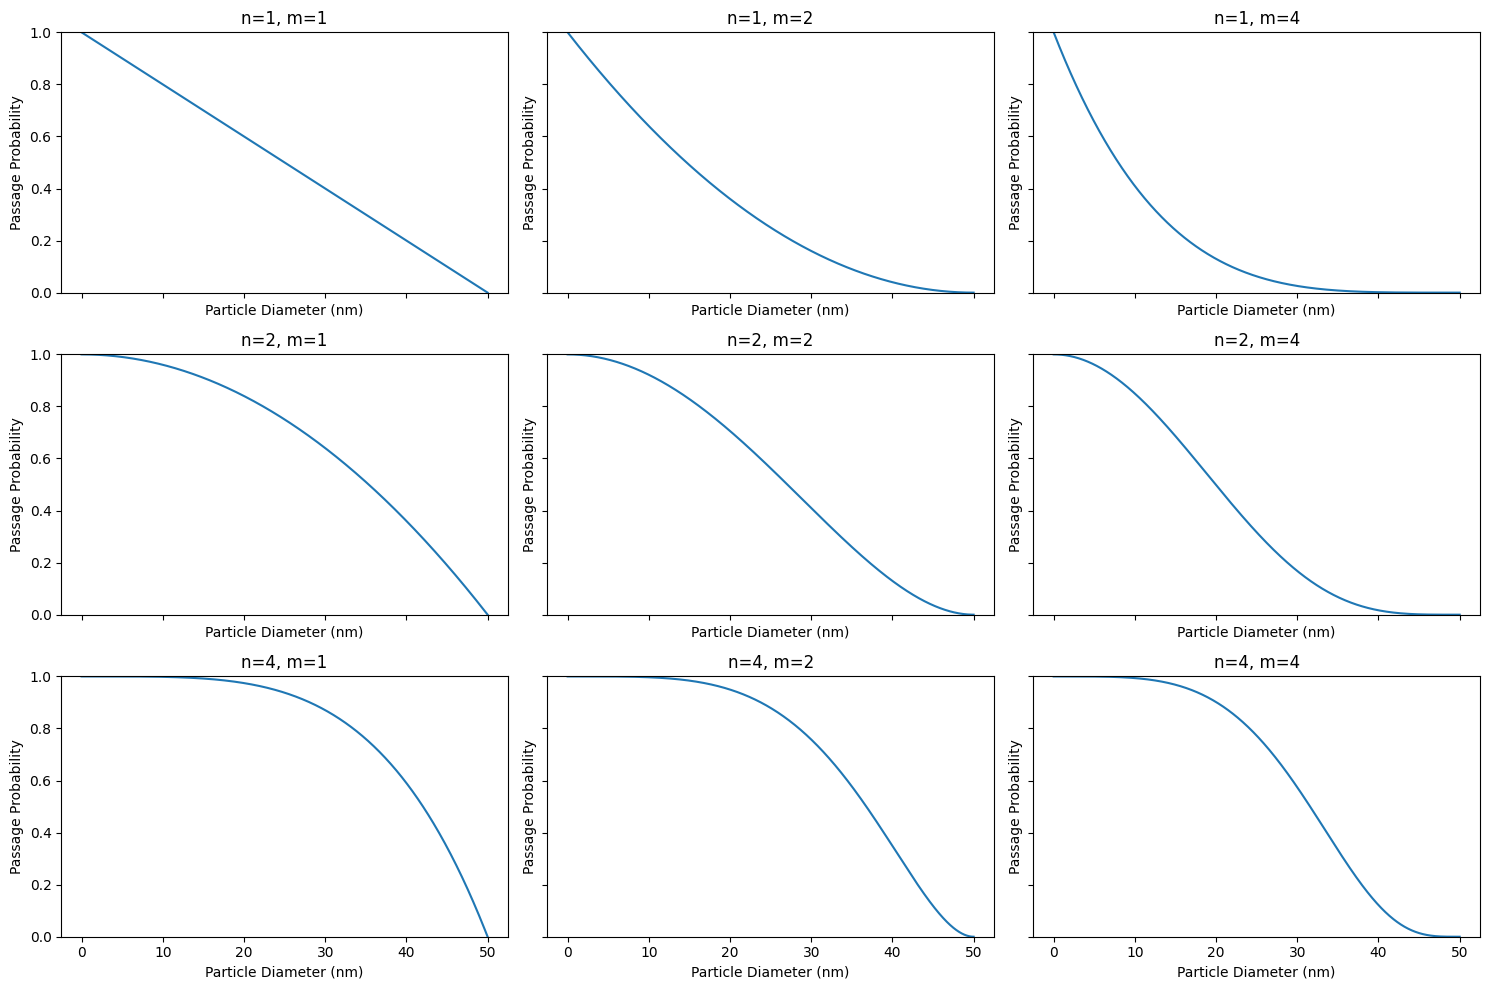

In [103]:
## Influence des paramètres n et m sur la fonction de passage

def passage_probability(pore_diameter, particle_diameter, n, m):
    return (1 - (particle_diameter / pore_diameter) ** n) ** m

# Propriétés du filtre
pore_diameter = 50  # 50 nm

# Diamètres des particules (échelle log)
particle_diameters = np.linspace(0, 50, 1000)  # De 1 nm à 100 nm

# Différentes valeurs de n et m
ns = [1, 2, 4]
ms = [1, 2, 4]

fig, ax = plt.subplots(len(ns), len(ms), figsize=(15, 10), sharex=True, sharey=True)

for i, n in enumerate(ns):
    for j, m in enumerate(ms):
        probabilities = [passage_probability(pore_diameter, d, n, m) for d in particle_diameters]
        ax[i, j].plot(particle_diameters, probabilities)
        ax[i, j].set_title(f'n={n}, m={m}')
        ax[i, j]
        ax[i, j].set_ylim(0, 1)
        ax[i, j].set_xlabel('Particle Diameter (nm)')
        ax[i, j].set_ylabel('Passage Probability')

plt.tight_layout()
plt.show()


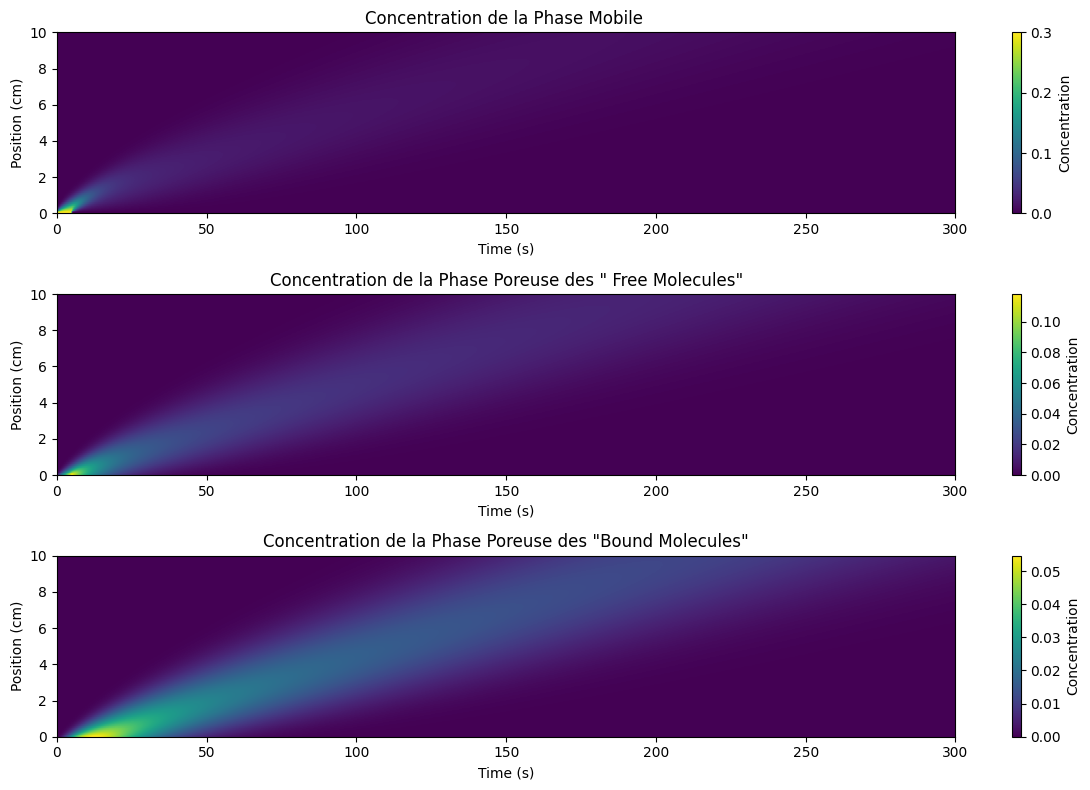

In [31]:
## In fine, on veut trouver un fenetre de temps tq la concentration en molécule d'intérêt est maximale et d'autre molécules minimale.
## J'ai l'impression qu'on a ici une solution d'une "molécule", qui possède une certaine concentration
## Il faudra peut être additionner les simulations, tweaker les para pour en récupérer la solution la plus pure
class Filtration:
    def __init__(self, feed, filter_size):
        self.feed = feed
        self.filter_size = filter_size

class Chromatography(Filtration):
    def __init__(self, L, T, v, D, Nx, Nt, pulse_duration, pulse_concentration, target_molecule, feed, filter_size):
        super().__init__(feed, filter_size)

        self.L = L # longueur de la colonne (cm)
        self.T = T # temps de la chromatographie
        self.v = v # velocité linéaire de la phase mobile (m/s)
        self.D = D # coefficient de diffusion  (m^2/s)
        self.Nx = Nx # discrétisation spatiale
        self.Nt = Nt  # discrétisation temporelle
        self.dx = L / Nx
        self.dt = T / Nt
        self.pulse_duration = pulse_duration # durée d'alimentation
        self.pulse_concentration = pulse_concentration # concentration de l'alimentation
        self.target_molecule = target_molecule # molécule d'interêt
        self.purified_product = []
        self.z = np.linspace(0, L, Nx)

        # Initialize concentration arrays
        self.c = np.zeros(Nx)
        self.cp = np.zeros(Nx)
        self.q = np.zeros(Nx)

        # Initial conditions
        self.c0 = lambda z: np.zeros_like(z)
        self.cp0 = lambda z: np.zeros_like(z)
        self.q0 = lambda z: np.zeros_like(z)

        self.c = self.c0(self.z)
        self.cp = self.cp0(self.z)
        self.q = self.q0(self.z)

        # Transport and production rates
        self.R = lambda c, cp, q: 0.1 * (c - cp)
        self.Rp = lambda c, cp, q: 0.1 * (c - cp)
        self.Rq = lambda c, cp, q: 0.1 * (cp - q)

        # Storage for results
        self.c_history = [self.c.copy()]
        self.cp_history = [self.cp.copy()]
        self.q_history = [self.q.copy()]


    def perform_chromatography(self):
        for n in range(self.Nt):
            t = n * self.dt
            J = -self.D * np.gradient(self.c, self.dx)
            N = self.v * self.c + J

            dc_dt = -np.gradient(N, self.dx) - self.R(self.c, self.cp, self.q)
            dcp_dt = self.Rp(self.c, self.cp, self.q)
            dq_dt = self.Rq(self.c, self.cp, self.q)

            self.c += dc_dt * self.dt
            self.cp += dcp_dt * self.dt
            self.q += dq_dt * self.dt

            if t <= self.pulse_duration:
                self.c[0] = self.pulse_concentration
            else:
                self.c[0] = 0.0

            self.c[-1] = self.c[-1]

            self.c_history.append(self.c.copy())
            self.cp_history.append(self.cp.copy())
            self.q_history.append(self.q.copy())

    def plot_results(self):
        c_history = np.array(self.c_history)
        cp_history = np.array(self.cp_history)
        q_history = np.array(self.q_history)

        plt.figure(figsize=(12, 8))

        plt.subplot(3, 1, 1)
        plt.title('Concentration de la Phase Mobile ')
        plt.imshow(c_history.T, aspect='auto', origin='lower', extent=[0, self.T, 0, self.L])
        plt.colorbar(label='Concentration')
        plt.xlabel('Time (s)')
        plt.ylabel('Position (cm)')

        plt.subplot(3, 1, 2)
        plt.title('Concentration de la Phase Poreuse des " Free Molecules"')
        plt.imshow(cp_history.T, aspect='auto', origin='lower', extent=[0, self.T, 0, self.L])
        plt.colorbar(label='Concentration')
        plt.xlabel('Time (s)')
        plt.ylabel('Position (cm)')

        plt.subplot(3, 1, 3)
        plt.title('Concentration de la Phase Poreuse des "Bound Molecules"')
        plt.imshow(q_history.T, aspect='auto', origin='lower', extent=[0, self.T, 0, self.L])
        plt.colorbar(label='Concentration')
        plt.xlabel('Time (s)')
        plt.ylabel('Position (cm)')

        plt.tight_layout()
        plt.show()

# Parameters
L = 10.0
T = 300.0
v = 0.1
D = 0.01
Nx = 100
Nt = 100000
pulse_duration = 5
pulse_concentration = 0.3
target_molecule = 'ARN'
feed = [{'type': 'ARN', 'concentration': 0.2}, {'type': 'Debris', 'concentration': 0.8}]
filter_size = 1.0

# Instantiate and run chromatography
chromatography = Chromatography(L, T, v, D, Nx, Nt, pulse_duration, pulse_concentration, target_molecule, feed, filter_size)
chromatography.perform_chromatography()
chromatography.plot_results()

In [26]:
usp.get_masse_X(100)

177.0787413970911

Optimal collection window: 0.003 s to 5.76 s


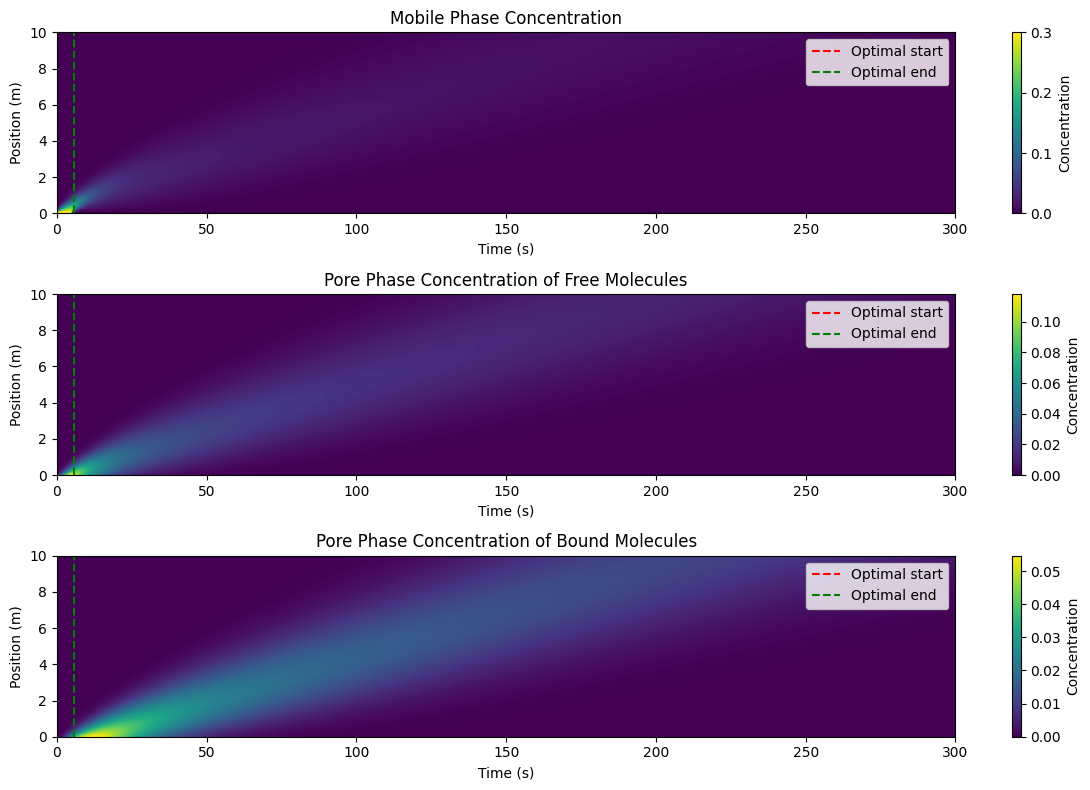

In [45]:
#WHere does the size of the particule come in clutch ?
L = 10.0          # Length of the column (m)
T = 300.0          # Total time (s)
v = 0.1          # Linear mobile phase velocity (m/s)
D = 0.01         # Diffusion coefficient (m^2/s)
Nx = 100        # Number of spatial grid points
Nt = 100000       # Number of time steps
dx = L / Nx      # Spatial step size
dt = T / Nt      # Time step size

# Inlet pulse parameters
pulse_duration = 5  # Duration of the pulse (s)
pulse_concentration = .3  # Concentration during the pulse

# Initialize concentration arrays
c = np.zeros(Nx)        # Mobile phase concentration
cp = np.zeros(Nx)       # Pore phase concentration of free molecules
q = np.zeros(Nx)        # Pore phase concentration of bound molecules


z = np.linspace(0, L, Nx)

# Initial conditions
c0 = lambda z: np.zeros_like(z)  # Initial mobile phase concentration
cp0 = lambda z: np.zeros_like(z) # Initial pore phase concentration of free molecules
q0 = lambda z: np.zeros_like(z)  # Initial pore phase concentration of bound molecules

# Apply initial conditions
c = c0(z)
cp = cp0(z)
q = q0(z)

# Transport and production rates
R = lambda c, cp, q: 0.1 * (c - cp)   # Example rate term for mobile phase
Rp = lambda c, cp, q: 0.1 * (c - cp)  # Example rate term for free molecules in pore phase
Rq = lambda c, cp, q: 0.1 * (cp - q)

# Storage for results
c_history = [c.copy()]
cp_history = [cp.copy()]
q_history = [q.copy()]

# Main loop
for n in range(0, Nt):
    # Current time
    t = n * dt

    # Calculate fluxes
    J = -D * np.gradient(c, dx)
    N = v * c + J

    # Update concentrations
    dc_dt = -np.gradient(N, dx) - R(c, cp, q)
    dcp_dt = Rp(c, cp, q)
    dq_dt = Rq(c, cp, q)

    c += dc_dt * dt
    cp += dcp_dt * dt
    q += dq_dt * dt

    # Apply rectangular pulse inlet boundary condition
    if t <= pulse_duration:
        c[0] = pulse_concentration
    else:
        c[0] = 0.0

    # Apply outlet boundary condition
    c[-1] = c[-1]  # Outflow follows the last grid point

    # Store results
    c_history.append(c.copy())
    cp_history.append(cp.copy())
    q_history.append(q.copy())

# Convert history to numpy arrays for easier slicing
c_history = np.array(c_history)
cp_history = np.array(cp_history)
q_history = np.array(q_history)

def find_optimal_window(concentration_profile, threshold):
    """
    Find the time window where the concentration of the molecule of interest
    exceeds the threshold, and the presence of other molecules is minimized.

    Args:
    concentration_profile (np.ndarray): 2D array of concentration over time and space.
    threshold (float): Concentration threshold for the molecule of interest.

    Returns:
    tuple: Start and end times of the optimal collection window.
    """
    max_concentration = np.max(concentration_profile, axis=1)
    above_threshold = np.where(max_concentration > threshold)[0]
    if len(above_threshold) == 0:
        return None, None

    start_time = above_threshold[0] * dt
    end_time = above_threshold[-1] * dt
    return start_time, end_time

# Find the optimal collection window
threshold = 0.2  # Example threshold for the molecule of interest
start_time, end_time = find_optimal_window(c_history, threshold)

print(f"Optimal collection window: {start_time} s to {end_time:.2f} s")

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.title('Mobile Phase Concentration')
plt.imshow(c_history.T, aspect='auto', origin='lower', extent=[0, T, 0, L])
plt.colorbar(label='Concentration')
plt.axvline(start_time, color='red', linestyle='--', label='Optimal start')
plt.axvline(end_time, color='green', linestyle='--', label='Optimal end')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()

plt.subplot(3, 1, 2)
plt.title('Pore Phase Concentration of Free Molecules')
plt.imshow(cp_history.T, aspect='auto', origin='lower', extent=[0, T, 0, L])
plt.colorbar(label='Concentration')
plt.axvline(start_time, color='red', linestyle='--', label='Optimal start')
plt.axvline(end_time, color='green', linestyle='--', label='Optimal end')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()

plt.subplot(3, 1, 3)
plt.title('Pore Phase Concentration of Bound Molecules')
plt.imshow(q_history.T, aspect='auto', origin='lower', extent=[0, T, 0, L])
plt.colorbar(label='Concentration')
plt.axvline(start_time, color='red', linestyle='--', label='Optimal start')
plt.axvline(end_time, color='green', linestyle='--', label='Optimal end')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()

plt.tight_layout()
plt.show()


Yield (Y): 0.0032
Productivity (Q): 0.0000 g/s


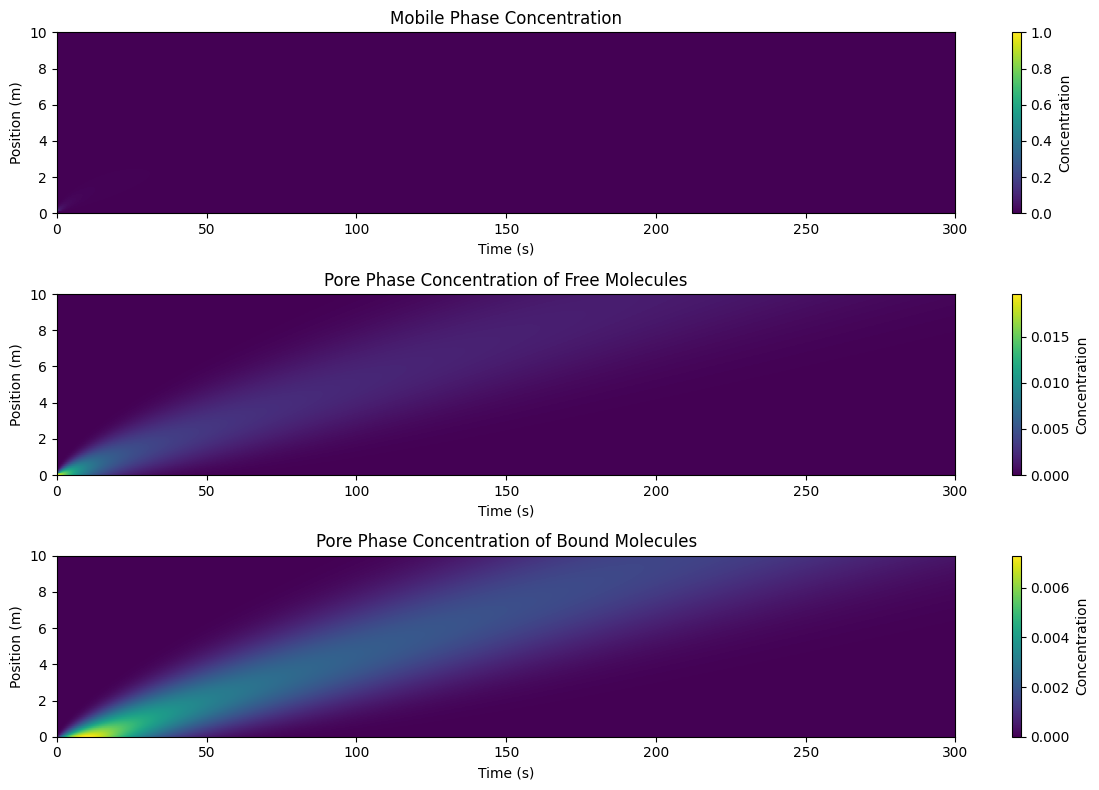

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10.0          # Length of the column (m)
T = 300.0          # Total time (s)
v = 0.1          # Linear mobile phase velocity (m/s)
D = 0.01         # Diffusion coefficient (m^2/s)
Nx = 100        # Number of spatial grid points
Nt = 100000       # Number of time steps
dx = L / Nx      # Spatial step size
dt = T / Nt      # Time step size


# Inlet pulse parameters
pulse_duration = 0.2  # Duration of the pulse (s)
pulse_concentration = 1.0  # Concentration during the pulse

# Initialize concentration arrays
c = np.zeros(Nx)        # Mobile phase concentration
cp = np.zeros(Nx)       # Pore phase concentration of free molecules
q = np.zeros(Nx)        # Pore phase concentration of bound molecules

# Initial conditions
c0 = lambda z: np.zeros_like(z)  # Initial mobile phase concentration
cp0 = lambda z: np.zeros_like(z) # Initial pore phase concentration of free molecules
q0 = lambda z: np.zeros_like(z)  # Initial pore phase concentration of bound molecules


# Apply initial conditions
z = np.linspace(0, L, Nx)
c = c0(z)
cp = cp0(z)
q = q0(z)

# Transport and production rates
R = lambda c, cp, q: 0.1 * (c - cp)   # Example rate term
Rp = lambda c, cp, q: 0.1 * (c - cp)  # Example rate term
Rq = lambda c, cp, q: 0.1 * (cp - q)  # Example rate term

# Storage for results
c_history = [c.copy()]
cp_history = [cp.copy()]
q_history = [q.copy()]

# Variables for yield and productivity
m = 0.0        # Accumulated mass of captured mAbs
m_in = 0.0     # Accumulated mass of injected mAbs
tc = 21 * L / v  # Time for phases 2-4 in terms of column volumes (21 CVs)

# Main loop
for n in range(1, Nt):
    # Current time
    t = n * dt

    # Calculate fluxes
    J = -D * np.gradient(c, dx)
    N = v * c + J

    # Update concentrations
    dc_dt = -np.gradient(N, dx) - R(c, cp, q)
    dcp_dt = Rp(c, cp, q)
    dq_dt = Rq(c, cp, q)

    c += dc_dt * dt
    cp += dcp_dt * dt
    q += dq_dt * dt

    # Apply rectangular pulse inlet boundary condition
    if t <= pulse_duration:
        c[0] = pulse_concentration
        m_in += pulse_concentration * dt  # Increment injected mass
    else:
        c[0] = 0.0

    # Apply outlet boundary condition
    c[-1] = c[-1]  # Outflow follows the last grid point

    # Update accumulated mass of captured mAbs
    m += np.sum(dq_dt) * dx * dt

    # Store results
    c_history.append(c.copy())
    cp_history.append(cp.copy())
    q_history.append(q.copy())

# Convert history to numpy arrays for easier slicing
c_history = np.array(c_history)
cp_history = np.array(cp_history)
q_history = np.array(q_history)

# Calculate yield and productivity
Y = m / m_in if m_in != 0 else 0
Q = m / (T + tc)

print(f"Yield (Y): {Y:.4f}")
print(f"Productivity (Q): {Q:.4f} g/s")

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.title('Mobile Phase Concentration')
plt.imshow(c_history.T, aspect='auto', origin='lower', extent=[0, T, 0, L])
plt.colorbar(label='Concentration')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

plt.subplot(3, 1, 2)
plt.title('Pore Phase Concentration of Free Molecules')
plt.imshow(cp_history.T, aspect='auto', origin='lower', extent=[0, T, 0, L])
plt.colorbar(label='Concentration')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

plt.subplot(3, 1, 3)
plt.title('Pore Phase Concentration of Bound Molecules')
plt.imshow(q_history.T, aspect='auto', origin='lower', extent=[0, T, 0, L])
plt.colorbar(label='Concentration')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

plt.tight_layout()
plt.show()
